In [313]:
import sklearn.decomposition as sk_decomp
from sklearn import linear_model as lm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score as cvs
from sklearn.svm import l1_min_c
import os

In [314]:
os.chdir("C:\\Users\\dwarf\\Dataproject")

In [315]:
meth_even = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_meth_even_with_background.tsv", sep="\t")
meth_odd = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_meth_odd_with_background.tsv", sep="\t")
unmeth_even = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_unmeth_even_with_background.tsv", sep="\t")
unmeth_odd = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_unmeth_odd_with_background.tsv", sep="\t")
#unmeth = pd.read_csv("processed_data\combined_data\split_with_background\combined_2mers_unmeth.tsv", sep="\t")

In [316]:
meth_even = meth_even.loc[meth_even["cancer"]=="Healthy"]
meth_odd = meth_odd.loc[meth_odd["cancer"]=="Healthy"]
unmeth_even = unmeth_even.loc[unmeth_even["cancer"]=="Healthy"]
unmeth_odd = unmeth_odd.loc[unmeth_odd["cancer"]=="Healthy"]

#meth = meth.iloc[: , :-1]
#unmeth = unmeth.iloc[: , :-1]

In [317]:
meth_even=meth_even.drop(306)
meth_odd=meth_odd.drop(306)
unmeth_even=unmeth_even.drop(306)
unmeth_odd=unmeth_odd.drop(306)

In [318]:
trow = 243

In [319]:
frames = [meth_even,meth_odd,unmeth_even,unmeth_odd]
combo = pd.concat(frames)
combo = combo.iloc[: , :-1]

In [320]:
combo.iloc[0:243] 

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
1,0.745990,1.96173,1.11633,1.06069,0.472634,1.15924,0.486418,0.673300,0.372710,1.030070,0.597585,0.711159,0.905156,2.48168,1.16541,1.16446
4,0.765763,2.01639,1.09923,1.17116,0.462408,1.14968,0.473197,0.697738,0.376041,1.082050,0.571893,0.804584,0.785160,2.35608,1.12315,1.18776
5,0.744810,2.03043,1.09679,1.25016,0.433465,1.09801,0.426635,0.729441,0.383215,1.011260,0.544227,0.746060,0.805039,2.48263,1.13847,1.24765
9,0.762464,2.01932,1.08753,1.23212,0.468885,1.15671,0.412302,0.718048,0.356838,1.044310,0.590990,0.784199,0.776410,2.36859,1.22165,1.09521
10,0.783611,2.15769,1.06376,1.13057,0.466868,1.15945,0.434469,0.700167,0.388226,1.055070,0.615569,0.752697,0.813164,2.33952,1.15691,1.09604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.750887,1.94822,1.14776,1.19727,0.487271,1.13555,0.471027,0.803251,0.368508,1.012370,0.561835,0.834766,0.781354,2.29282,1.13076,1.18263
468,0.785029,1.98449,1.16794,1.27191,0.461864,1.09329,0.487549,0.747942,0.368849,0.980139,0.575871,0.830620,0.885649,2.22797,1.15630,1.18501
469,0.717069,1.91093,1.16673,1.17391,0.444564,1.16309,0.476034,0.772158,0.368822,1.012170,0.607071,0.776792,0.768683,2.33469,1.17217,1.18401
470,0.710660,1.97213,1.09421,1.32320,0.491878,1.16158,0.441435,0.804165,0.426081,0.938846,0.588999,0.757741,0.813962,2.25326,1.13260,1.22402


In [321]:
pca = sk_decomp.PCA(n_components=16)
combo = pca.fit_transform(combo)

In [322]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [323]:
y1 = [0]*(trow)
y2 = [0]*(trow)
y3 = [1]*(trow)
y4= [1]*(trow)
Y = [y1,y2,y3,y4]
Ytrain = [y1,y3]
Ytest = [y2,y4]

In [324]:
y = []
for i in range(4):
    for j in Y[i]:
        y.append(Y[i][j])

In [325]:
ytrain = []
for i in range(2):
    for j in Ytrain[i]:
        ytrain.append(Ytrain[i][j])

In [326]:
ytest = []
for i in range(2):
    for j in Ytest[i]:
        ytest.append(Ytest[i][j])

In [327]:
y1p = [0]*(trow)
y2p = [0]*(trow)
y3p = [1]*(trow)
y4p= [1]*(trow)
Yp = [y1p,y2p,y3p,y4p]

In [328]:
yp = []
for i in range(4):
    for j in Yp[i]:
        yp.append(Yp[i][j])

In [329]:
x1 = combo[trow * 0:trow * 1]
x2 = combo[trow * 1:(trow * 2)]
x3 = combo[trow * 2:(trow * 3)]
x4 = combo[trow * 3:(trow * 4)]
X = [x1,x2,x3,x4]
Xtrain = [x1,x3]
Xtest = [x2,x4]

In [330]:
x = []
for i in range(4):
    for j in range(len(X[i])):
        x.append(X[i][j])

In [331]:
xtrain = []
for i in range(2):
    for j in range(len(Xtrain[i])):
        xtrain.append(Xtrain[i][j])
xtest = []
for i in range(2):
    for j in range(len(Xtest[i])):
        xtest.append(Xtest[i][j])

In [332]:
cs = l1_min_c(xtrain,ytrain, loss = 'log') * np.logspace(0,10,16)

In [333]:
clf = LR(penalty = 'l1',solver='liblinear',tol=1e-6,max_iter=100,warm_start=True,intercept_scaling=10000.0)

In [334]:
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(xtrain,ytrain)
    coefs_.append(clf.coef_.ravel().copy())
coefs_ = np.array(coefs_)

c:\Users\dwarf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


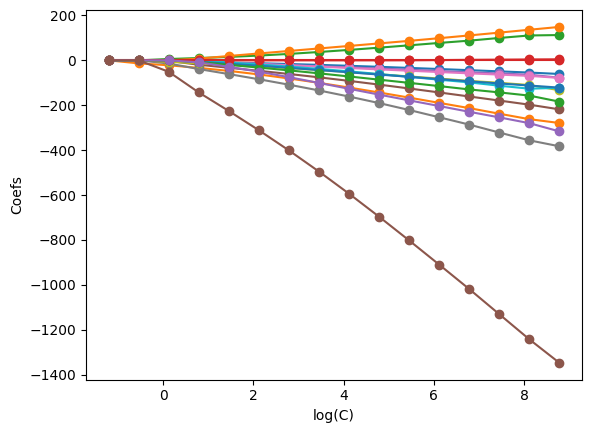

In [335]:
plt.plot(np.log10(cs),coefs_,marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefs")
plt.axis("tight")
plt.show()

In [340]:
clf.predict_proba(xtest)

array([[1.00000000e+00, 2.82962533e-24],
       [1.00000000e+00, 1.30160313e-24],
       [1.00000000e+00, 2.77735924e-19],
       [1.00000000e+00, 6.39514663e-27],
       [1.00000000e+00, 7.77481209e-22],
       [1.00000000e+00, 5.11515454e-15],
       [1.00000000e+00, 2.81751067e-18],
       [1.00000000e+00, 3.80141960e-30],
       [9.99999987e-01, 1.32002787e-08],
       [1.00000000e+00, 2.37463455e-22],
       [1.00000000e+00, 8.06793536e-17],
       [1.00000000e+00, 1.32244212e-25],
       [1.00000000e+00, 2.41524214e-31],
       [1.00000000e+00, 4.63205162e-16],
       [1.00000000e+00, 1.09380937e-14],
       [1.00000000e+00, 9.90038156e-22],
       [1.00000000e+00, 1.96632875e-20],
       [1.00000000e+00, 1.38135621e-19],
       [1.00000000e+00, 4.51584038e-23],
       [1.00000000e+00, 3.66276469e-25],
       [1.00000000e+00, 4.40450297e-33],
       [1.00000000e+00, 9.30090076e-15],
       [1.00000000e+00, 1.73085104e-29],
       [1.00000000e+00, 1.49854998e-30],
       [1.000000

In [337]:
scores = cvs(clf, xtest, ytest)
scores.mean()

1.0